## Conway's "Game of Life"

The **Game of Life (GoL)** is a cellular automaton devised by British mathematician John Conway in 1970. It's a "zero-player game" -- its evolution is determined by its initial state, requiring no further input from the user / experimenter.

### Definition
The GoL consists of an 'infinite' grid of cells (that is, a torus). It's just a matrix -- some number of columns and rows. Each cell (e.g., the 4th column of the 3rd row) can be 'alive' or 'dead'. The state of a cell at the next step (in the 'next generation') is determined by its current state and the number of living neighbors (adjacent cells) it has. The rules are simple:
1. Any live cell with fewer than two live neighbors dies (underpopulation).
2. Any live cell with two or three live neighbors lives on to the next generation.
3. Any live cell with more than three live neighbors dies (overpopulation).
4. Any dead cell with exactly three live neighbors becomes a live cell (reproduction).

### Conway's Motivation
Conway developed the GoL to simulate and explore complex systems and patterns that emerge from simple rules. He was interested in creating a system that could model biological and morphological phenomena, yet be governed by straightforward principles (the simple rules). 

### Impact and Utility
The GoL has proven incredibly useful in various fields including mathematics, computer science, physics, and biology. It's a classic example of how simple rules can lead to complex and unpredictable behaviors. Patterns in the Game of Life can simulate logic gates, memory storage, and even perform calculations, making it *Turing complete* (though a general-purpose computer implemented from GoL would be painfully slow). 

### Thus...
... the Game of Life is more than a mathematical curiosity; it's a profound illustration of how complexity can arise from simplicity, reflecting processes observed in nature and the universe. Its enduring appeal and widespread applications underline the depth of its conceptual foundations... 

-------

### Why are we using GoL for this course?

GoL illustrates some really interesting principles that are relevant for Models of the Mind: e.g., how global complexity can result from simple local interactions, and the utility of conducting simulations for systems where we cannot mathematically predict how the system will behave. We are not ready for this lesson at the start of the course, though. The reason to explore this simulation is that it gives us a great example we can play with in preparation for cognitive models later on. In particular, I hope you embrace the opportunity to experiment with variables you can set, etc. This will be our first taste of actively engaging in simulations. I hope you enjoy the experience of using this notebook to engage in some genuine scientific exploration in a virtual laboratory (or playground).

------

### The simulations

Skim the code that follows. Do not worry if you do not understand it. What's more important for now is the simulation itself, which you'll find after the code. 

For those who want to understand the code, skim from top to bottom, mainly just taking note of the kinds of functions / methods that are defined. The key line is the very last one:

`game_of_life_anim = GameOfLifeAnimation()`

This creates a new object, `game_of_life_anim`, which is an instance of the `class` called `GameOfLifeAnimation`. You'll see that it has a special initialization method (`__init__`) that is called when a new class instance is defined. This includes creating the 'widgets' (buttons, etc.) the user can interact with. The next major thing that will happen is when the user clicks the `Start` button, which calls the `GameOfLifeAnimation` method, `start`. You have to work through the series of other methods that are triggered by `start`, as well as those triggered by the other buttons.

------

Text(value='100', description='Rows:')

Text(value='100', description='Cols:')

Text(value='1000', description='Initial Cells:')

Text(value='10', description='History:')

Text(value='10', description='Interval (ms):')

Text(value='200', description='Timesteps:')

Button(description='Start', style=ButtonStyle())

Button(description='Pause', style=ButtonStyle())

Button(description='Forward', style=ButtonStyle())

Button(description='Back', style=ButtonStyle())

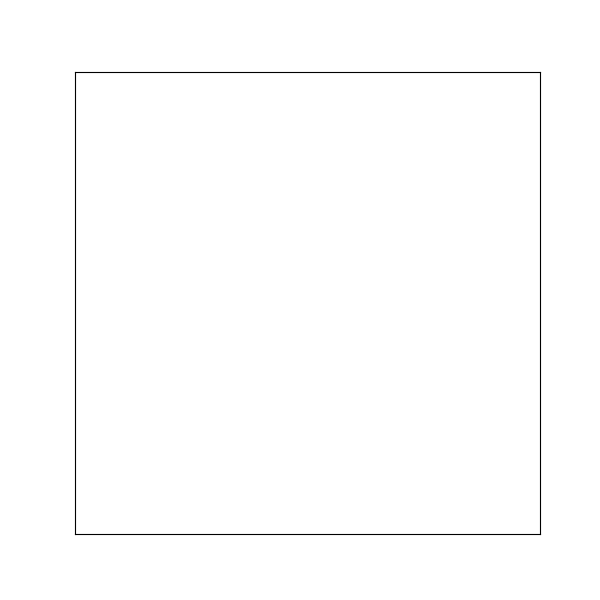

In [11]:
# enable animation in jupyter 
%matplotlib widget

# Importing necessary libraries
import numpy as np                  # NumPy for numerical operations, such as handling arrays
import matplotlib.pyplot as plt     # pyplot for plotting and visualizing data
import matplotlib.animation as animation # Animation module for creating animations
import ipywidgets as widgets        # For creating interactive widgets in Jupyter notebooks
from IPython.display import display # For rendering widgets in Jupyter notebooks
#from collections import deque       # For using double-ended queues, necessary for history

# Function to initialize the grid with given rows, columns, and initial live cells
def initialize_grid(rows, cols, initial_cells):
    grid = np.zeros((rows, cols)) # Creating a grid of zeros
    
    # Choosing random cells to be alive based on user-settable parameter, initial_cells
    initial_cells_coords = np.random.choice(rows * cols, initial_cells, replace=False) 
    
    # Marking the chosen cells as alive
    grid[np.unravel_index(initial_cells_coords, (rows, cols))] = 1 
    return grid

def update_grid(grid):
    ''' 
        Note you can use 3 ' marks to start and end an extended comment.
    
        Function to update the grid based on the rules of Conway's Game of Life

        Implements the rules of Conway's Game of Life, a cellular automaton devised by 
        mathematician John Conway. The game is played on an 'infinite' grid of cells 
        ('infinite' because interactions occur across edges -- cells on right & left edges are 
        neighbors and influence each other, and top and bottom edge cells are neighbors; 
        this can also be described as using 'periodic boundary conditions'; i.e., the wrapping 
        grid forms a torus). 

        Each cell is in one of two possible states: alive (1, filled) or dead (0, empty).

        Each cell consults the states of its eight neighbors (horizontal, vertical, and 
        diagonal) and its own state is updated based on the following rules:

          1. Underpopulation: Any live cell with fewer than two live neighbors dies, as if by 
             underpopulation.
          2. Continuation: Any live cell with two or three live neighbors lives on to the next 
             'generation' (time step).
          3. Overpopulation: Any live cell with more than three live neighbors dies, as if by 
             overpopulation.
          4. Reproduction: Any dead cell with exactly three live neighbors becomes a live cell, 
             as if by reproduction.

        The function takes the current grid states as input and returns a new grid representing 
        the next state. 
    '''

    new_grid = grid.copy() # Creating a copy of the current grid
    rows, cols = grid.shape # Getting the grid shape (dimensions)
    for i in range(rows):
        for j in range(cols):
            
            # Calculating the total number of alive neighbors for the cell grid(i, j);
            # we need to check the states of the 8 cells around cell i,j:
            #
            # 1 [i, (j-1)%cols]: Left neighbor; wraps if at left edge
            # 2 [i, (j+1)%cols]: Right neighbor; wraps if at right edge
            # 3 [(i-1)%rows, j]: Top neighbor; wraps if at top edge
            # 4 [(i+1)%rows, j]: Bottom neighbor; wraps if at bottom edge
            # 5 [(i-1)%rows, (j-1)%cols]: Top-left diagonal; wraps if at (grid) corner
            # 6 [(i-1)%rows, (j+1)%cols]: Top-right diagonal; wraps if at corner
            # 7 [(i+1)%rows, (j-1)%cols]: Bottom-left diagonal; wraps if at corner
            # 8 [(i+1)%rows, (j+1)%cols]: Bottom-right diagonal; wraps if at corner
            #
            # The values are added together to count living neighbors. The use of the 
            # modulo operation (%) ensures that the grid behaves as a torus, 
            # allowing cells on the edges of the grid to consider cells on the 
            # opposite edge as neighbors.

            total = int((grid[i, (j-1)%cols] + grid[i, (j+1)%cols] +
                         grid[(i-1)%rows, j] + grid[(i+1)%rows, j] +
                         grid[(i-1)%rows, (j-1)%cols] + grid[(i-1)%rows, (j+1)%cols] +
                         grid[(i+1)%rows, (j-1)%cols] + grid[(i+1)%rows, (j+1)%cols]))

            # Implementing the rules of Conway's Game of Life

            # Rules 1 (die if < 2 neighbors) & 3 (die if > 3 neighbors)
            if grid[i, j] == 1 and (total < 2 or total > 3): 
                new_grid[i, j] = 0 # 0 = dead, will be empty in plot
            # Rule 4: Dead cell with 3 live neighbors becomes a live cell                
            elif grid[i, j] == 0 and total == 3: 
                new_grid[i, j] = 1 # 1 = live, will be filled in plot
            #################    
            # To think about: why don't we need an explicit statement for Rule 2?
            #################
            
    # return updated states of cells            
    return new_grid

# Class to handle the Game of Life animation
class GameOfLifeAnimation:
    def __init__(self):
        # Creating input widgets for user to define the grid properties
        self.rows_text = widgets.Text(value='100', description='Rows:')
        self.cols_text = widgets.Text(value='100', description='Cols:')
        self.initial_cells_text = widgets.Text(value='1000', description='Initial Cells:')
        self.history_text = widgets.Text(value='10', description='History:')
        self.timesteps_text = widgets.Text(value='200', description='Timesteps:')
        self.interval_text = widgets.Text(value='10', description='Interval (ms):')

        # These set the default proportions of the 'display' where the grid will appear.
        # You can make the plot larger or smaller with this, or by looking for the dragable
        # grey corner to the bottom left of the plot window. 
        plot_width = 6
        plot_height = 6
        
        fig, ax = plt.subplots(figsize=(plot_width, plot_height)) # Creating plot area
        self.ax = ax
        plt.axis('on') # plot border around plot area
        plt.xticks([]) # do not plot x ticks
        plt.yticks([]) # do not plot y ticks

        # Initializing variables for the animation
        self.animation = None
        self.paused = False
        #self.history = deque(maxlen=int(self.history_text.value)) # Using deque to store history of states
        self.history = []
        self.current_timestep = 0

        # Creating buttons to start, pause, move forward, and move back in the simulation
        self.start_button = widgets.Button(description="Start")
        self.start_button.on_click(self.start)
        self.pause_button = widgets.Button(description="Pause")
        self.pause_button.on_click(self.toggle_pause)
        self.forward_button = widgets.Button(description="Forward")
        self.forward_button.on_click(self.forward)
        self.back_button = widgets.Button(description="Back")
        self.back_button.on_click(self.back)

        # Displaying the widgets
        display(self.rows_text, self.cols_text, self.initial_cells_text, self.history_text,
                self.interval_text, self.timesteps_text, self.start_button, self.pause_button,
                self.forward_button, self.back_button)

    # Function to start the animation
    def start(self, b):
        self.current_timestep = 0
        rows = int(self.rows_text.value)
        cols = int(self.cols_text.value)
        initial_cells = int(self.initial_cells_text.value)
        self.history = []
        #self.history = deque(maxlen=int(self.history_text.value))
        self.grid = initialize_grid(rows, cols, initial_cells)
        self.history.append(self.grid.copy())
        self.ax.clear()
        plt.axis('on')
        plt.xticks([])
        plt.yticks([])
        plt.xlim(-0.5, cols - 0.5)
        plt.ylim(rows - 0.5, -0.5)
        self.im = plt.imshow(self.grid, cmap="binary")
        plt.gca().add_patch(plt.Rectangle((-0.5, -0.5), cols, rows, linewidth=1, edgecolor="lightblue", facecolor="none"))
        self.animation = animation.FuncAnimation(plt.gcf(), self.update, frames=int(self.timesteps_text.value), interval=int(self.interval_text.value), blit=True, repeat=False)
        plt.show()

    # Function to continue the animation
    def continue_animation(self, b):
        if self.current_timestep < self.total_timesteps:
            additional_timesteps = int(self.timesteps_text.value)
            self.total_timesteps += additional_timesteps
            self.animation = animation.FuncAnimation(plt.gcf(), 
                                                     self.update, 
                                                     frames=self.total_timesteps, 
                                                     interval=int(self.interval_text.value), 
                                                     blit=True, repeat=False)
            plt.show()

    # Function to pause or resume the animation
    def toggle_pause(self, b):
        if self.current_timestep >= int(self.timesteps_text.value) - 1:
            return
        if self.animation:
            if self.paused:
                self.animation.event_source.start()
                self.pause_button.description = "Pause"
            else:
                self.animation.event_source.stop()
                self.pause_button.description = "Resume"
            self.paused = not self.paused

    # Function to move one step forward in the simulation
    def forward(self, b):
        if self.grid is not None and self.current_timestep < int(self.timesteps_text.value):
            self.grid = update_grid(self.grid)
            self.history.append(self.grid.copy())  # Add the new state to history
            
            # Enforce maximum length of history
            if len(self.history) > int(self.history_text.value):
                self.history.pop(0)
                
            self.im.set_array(self.grid)
            plt.draw()
            self.current_timestep += 1
            self.update_title()

    # Function to move one step back in the simulation
    def back(self, b):
        if self.history:
            self.history.pop()  # Remove the latest state from history
            if self.history:
                self.grid = self.history[-1].copy()
                self.im.set_array(self.grid)
                plt.draw()
                self.current_timestep -= 1
                self.update_title()

    # Function to update the animation frame
    def update(self, i):
        if i >= int(self.timesteps_text.value):
            self.animation.event_source.stop()
            return (self.im,)
        
        self.grid = update_grid(self.grid)
        self.history.append(self.grid.copy())  # Add the new state to history
        
        # Enforce maximum length of history
        if len(self.history) > int(self.history_text.value):
            self.history.pop(0)

        self.current_timestep = i
        self.update_title()
        self.im.set_array(self.grid)
        return (self.im,)
    
    # Function to update the title of the plot
    def update_title(self):
        self.ax.set_title(f"Conway's Game of Life - Timestep {self.current_timestep}")

# Creating an instance of the GameOfLifeAnimation class to start the simulation
game_of_life_anim = GameOfLifeAnimation()

## <font color='red'>Lab exercises</font>

*To complete this lab, compose a short text document. Copy and paste the questions in, and answer below the questions. Make sure to address each part. Save the document as plain text, RTF, .doc, .docx, or PDF. Do not send a link to a google doc, since those can be updated after you turn them in. **Email your report** to james.magnuson@uconn.edu*

*Plan to spend 30-60 minutes on this. You can of course do more. You do not have to exhaustively address every point -- just explore each one and provide a brief response about each (part of each) question in your report. *

1. Just do a few runs. With the default parameters, how stable is the system after 200 time steps? 'Static' would mean that there are no more changes, even if there are some elements that are oscillating on and off (that is, if it settles into a a repeating pattern that it never escapes). Note that the plot stops updating after 200 timesteps by default; that stopping is not a static state, we've just cut it off. To run repeated simulations, just click the `Start` button again. 

<div class="alert alert-block alert-info">

**Note.** *If you want the plot to be larger or smaller, click and drag the grey triangle you should see to the lower right of the plot.*

</div>

2. If things tend to still change after 200 timesteps, increase the number of time steps and run a few more simulations -- can you determine a value by which the system *tends* to be stable/static? If instead you find that the system becomes stable/static earlier than 200, report that value. If you are increasing the number of timesteps, try a few runs at different values. You do not need to do this for hours and hours! 

<div class="alert alert-block alert-info">
    
**Note.**  *You may find that the simulator gets 'confused' sometimes, such that you can't really read the timestep value at the top of the plot. This can happen if you click *`Start`* while a simulation is still running, for example. What happens is that more updates have been calculated by the simulation code faster than the plot can be updated. If this happens, there are a few ways to fix it. (1) Press* `Pause` *and wait until it actually pauses (after all pending updates happen). You will likely have to press* `Resume` *to continue. (2) Change* `Interval` *to a larger number. This is the number of milliseconds the animation function waits before trying to plot the next update. Larger values may allow the system to work more smoothly, though I have not been able to verify that yet. (3) If all else fails, you can choose *`Restart kernel`* from the *`Kernel`* menu. Note that this will relaunch the entire notebook. In later notebooks with multiple blocks of code, if you restart the kernel, you may have to re-run all preceding code blocks before the one you are working on will work correctly (if it makes use of variables or function defintions from earlier code blocks, for example).*

*Another way things can get wonky is if you have set `Timesteps` to a very large value. Currently, I have not been able to find a way to gracefully interupt a run, so you may have to wait until the maximum timestep is reached, or restart the kernel. You can tell if the system is still running by looking at the *`Python 3 (ipykernel)`* message on the bottom of the window; if it says 'busy' it is still running. There is also a message at the top right of this tab.*
    
</div>

3. Let's try changing *initial conditions* instead. First, explore `Initial cells`. This is how many cells are selected at random to be *live* at the start of the simulation. What happens when you make this very small? What about very big? Can you find a value that tends to lead the system to become stable before 200 ms?

4. Now try changing the grid size. Try 50 rows and 100 columns (you may need to adjust the plot size to make it conveniently visible -- click and drag the grey triangle to the bottom right of the plot). Explore other values -- what happens with very small or very large plots? 

***Challenge questions. Grad students and honors students: answer at least one.*** 

5. Do any tendencies emerge that you can express mathematically (even just in terms of ratios, perhaps)?
6. Look at how the rules are implemented in the Python code. In the Python cell, look at lines that start from line 81 (to see line numbers, enable 'Show line numbers' from the jupyter window 'View' menu), where you'll see the comment `# Implementing the rules of Conway's Game of Life`. You'll see that rule #2 is not explicitly stated. Why does it not need to be explicitly stated?
7. Try changing the rules. Briefly describe your changes and any differences you observe. (Suggestion: you could make a new notebook by clicking the blue + button in the left side file browser -- if you do not see that, click the black folder icon in the upper left of the jupyter window. Then just copy and paste the code from the python cell into the new notebook. Then you could modify the copy, while you could still keep the original 'intact' for comparison.)
8. Can you modify the code to include a 'continue' button that would continue the simulation from the final step? So if steps is set to 100, if you press 'continue', it would go for another 100 steps? Note that this is more difficult than it may sound!
9. Can you propose and/or implement any other improvements for this simulator? 




